In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips_df = pd.read_csv('tips.csv')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
len(tips_df)

244

## To find the best fit linear line

$$\hat{y} = b_1 \hat{x} + b_0$$
$$b_1 = \dfrac{\Sigma (x_i - \hat{x} ) (y_i - \hat{y} )} {\Sigma (x_i - \hat{x} ) ^ 2}$$
$$b_0 = \hat{y} - b_1 \hat{x}$$

In [7]:
tips_df['bill_deviation'] = tips_df['total_bill'] - tips_df['total_bill'].mean()

In [8]:
tips_df['tip_deviation'] = tips_df['tip'] - tips_df['tip'].mean()

In [9]:
tips_df['deviation_products'] = tips_df['bill_deviation'] * tips_df['tip_deviation']

In [11]:
tips_df['bill_deviations_squared'] = tips_df['bill_deviation'] ** 2

In [12]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,bill_deviation,tip_deviation,deviation_products,bill_deviations_squared
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.795943,-1.988279,5.559113,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,-9.445943,-1.338279,12.641304,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,1.224057,0.501721,0.614136,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.894057,0.311721,1.213861,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,4.804057,0.611721,2.938744,23.078967


In [13]:
# y = b0 + b1x
b1 = tips_df['deviation_products'].sum() / tips_df['bill_deviations_squared'].sum()

In [14]:
b1

0.10502451738435342

In [20]:
b0 = tips_df['tip'].mean() - b1 * tips_df['total_bill'].mean()

In [21]:
b0

0.9202696135546722

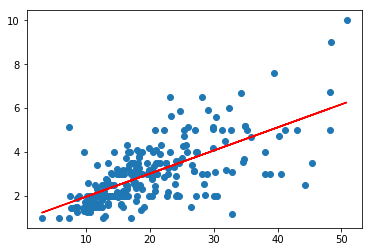

In [22]:
plt.plot(tips_df.total_bill, tips_df.tip, 'o')
x = tips_df.total_bill
plt.plot(x, b1*x + b0, 'r', label='Best Fit Line')

In [23]:
# Using Numpy for a univariate linear regression
X = tips_df.total_bill
X = np.vstack(tips_df.total_bill)
Y = tips_df.tip

In [24]:
X = np.array([[value, 1] for value in X])

In [25]:
m, b = np.linalg.lstsq(X, Y)[0]

In [26]:
m

0.10502451738435337

In [27]:
b

0.92026961355467274

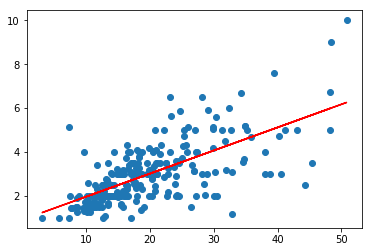

In [28]:
plt.plot(tips_df.total_bill, tips_df.tip, 'o')
x = tips_df.total_bill
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [29]:
result = np.linalg.lstsq(X, Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [30]:
rmse

array([ 1.0178504])

The above result of rmse means we can reasonably expect a tip to be within $2 of our line fit.

Using Scikit Learn

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lreg = LinearRegression()

In [42]:
X = np.vstack(tips_df.total_bill)
X = np.array([[value, 1] for value in X])
Y_target = tips_df.tip

In [43]:
lreg.fit(X,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 0.92 


In [48]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 2 


In [50]:
coeff_df = pd.DataFrame(tips_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,total_bill,0.105025
1,tip,0.000000
2,sex,NaN
3,smoker,NaN
4,day,NaN
5,time,NaN
6,size,NaN
7,bill_deviation,NaN
8,tip_deviation,NaN
9,deviation_products,NaN


In [51]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,tips_df.tip)

In [52]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [54]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.08
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.93


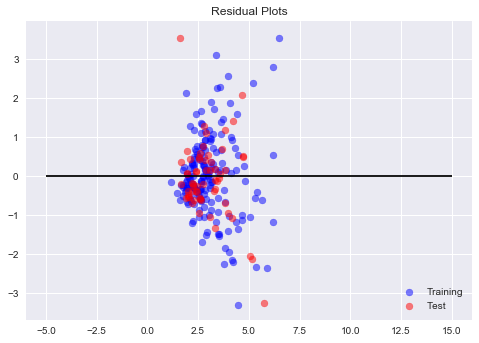

In [61]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-5,xmax=15)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower right')
plt.title('Residual Plots')

In [57]:
import seaborn as sns

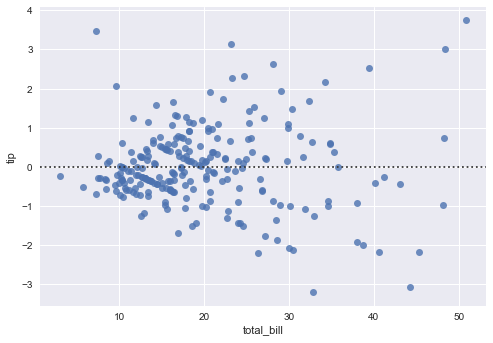

In [58]:
sns.residplot('total_bill', 'tip', data = tips_df)